#Importing Dataset

#Importing libraries

In [326]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#Data Preprocessing

##Training Image preprocessing

In [327]:
import tensorflow as tf

training_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/Shanvi/Desktop/data/train',  # Path to your local directory
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 1007 files belonging to 2 classes.


##Validation Image Preprocessing

In [328]:
validation_set =  tf.keras.utils.image_dataset_from_directory(
    'C:/Users/Shanvi/Desktop/data/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 960 files belonging to 2 classes.


In [329]:
num_classes = len(training_set.class_names)
print (training_set.class_names)

['150 grams', '50 grams']


#Building Model

In [330]:
cnn = tf.keras.models.Sequential()
   

In [331]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

##Building Convolution Layer

In [332]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [333]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [334]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [335]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [336]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [337]:
cnn.add(tf.keras.layers.Flatten())

In [338]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))

In [339]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [340]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [341]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=2,activation='softmax'))

#Compiling and Training Phase

In [342]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [343]:
cnn.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_96 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_97 (Conv2D)              │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_72 (Dropout)            │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_98 (Conv2D)              │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_99 (Conv2D)              │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_73 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_100 (Conv2D)             │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_101 (Conv2D)             │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_74 (Dropout)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_102 (Conv2D)             │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_103 (Conv2D)             │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_75 (Dropout)            │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_76 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_77 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,828,898 (6.98 MB)

 Trainable params: 1,828,898 (6.98 MB)

 Non-trainable params: 0 (0.00 B)

In [344]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)  # Modified to train for 50 epochs

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 548ms/step - accuracy: 0.5119 - loss: 3.2416 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 510ms/step - accuracy: 0.5632 - loss: 0.6886 - val_accuracy: 0.5125 - val_loss: 0.6882
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 529ms/step - accuracy: 0.5159 - loss: 0.6735 - val_accuracy: 0.6167 - val_loss: 0.6676
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 510ms/step - accuracy: 0.6894 - loss: 0.6249 - val_accuracy: 0.6333 - val_loss: 0.6287
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 506ms/step - accuracy: 0.7053 - loss: 0.5921 - val_accuracy: 0.8667 - val_loss: 0.3999
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 513ms/step - accuracy: 0.8360 - loss: 0.4382 - val_accuracy: 0.7583 - val_loss: 0.4951
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 510ms/step - accuracy: 0.8411 - loss: 0.3872 - val_accuracy: 0.9083 - val_loss: 0.2470
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 508ms/step - accuracy: 0.8900 - loss: 0.2740 - val_accu

##Evaluating Model

In [345]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - accuracy: 0.9209 - loss: 0.2830
Training accuracy: 0.9245283007621765


In [346]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - accuracy: 0.9292 - loss: 0.2406
Validation accuracy: 0.9291666746139526


##Saving Model

In [347]:
cnn.save('gram_model.h5')

In [348]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5292949080467224,
  0.5451837182044983,
  0.5451837182044983,
  0.6415094137191772,
  0.7715988159179688,
  0.8311817049980164,
  0.8748758435249329,
  0.8877854943275452,
  0.9116186499595642,
  0.8142998814582825],
 'loss': [1.6263844966888428,
  0.690653920173645,
  0.6551862955093384,
  0.6426958441734314,
  0.5372233986854553,
  0.4356418550014496,
  0.33451762795448303,
  0.28250688314437866,
  0.25483086705207825,
  0.44368821382522583],
 'val_accuracy': [0.5,
  0.512499988079071,
  0.6166666746139526,
  0.6333333253860474,
  0.8666666746139526,
  0.7583333253860474,
  0.9083333611488342,
  0.9166666865348816,
  0.9541666507720947,
  0.9291666746139526],
 'val_loss': [0.6930742263793945,
  0.6882386803627014,
  0.667637288570404,
  0.6287392377853394,
  0.3998878300189972,
  0.4950925409793854,
  0.246963769197464,
  0.260545939207077,
  0.13466596603393555,
  0.2478867918252945]}

In [349]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [350]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


##Calculating Accuracy of Model Achieved on Validation set

In [351]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 92.91666746139526 %


#Accuracy Visualization

##Training Visualization

In [352]:
#training_history.history['accuracy']

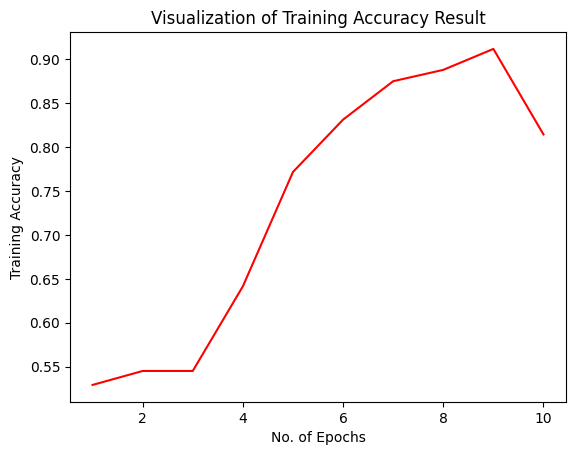

In [353]:
epochs = range(1, len(training_history.history['accuracy']) + 1)
plt.plot(epochs, training_history.history['accuracy'], color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

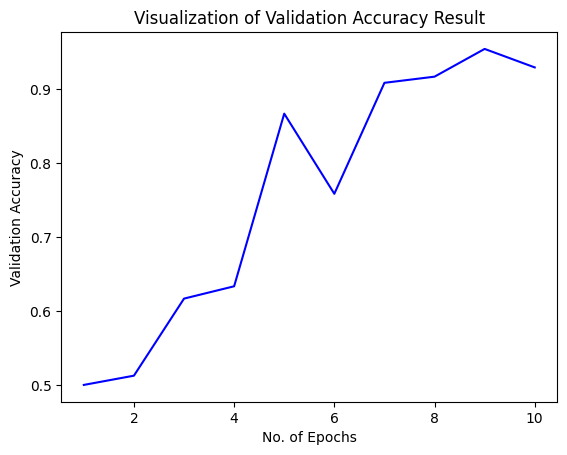

In [354]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test set Evaluation

In [355]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/Shanvi/Desktop/data/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 240 files belonging to 2 classes.


In [356]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.9629 - loss: 0.1890
Test accuracy: 0.9624999761581421
